In [1]:
import numpy as np
from datetime import datetime as dt  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
secinday = 24*3600
palette=sns.color_palette("colorblind")
darkblue = palette[0]
lightblue = palette[4]
purple = palette[9]

In [3]:
#Import head measurement for JEME
jeme = pd.read_csv('Field_Data/head_jeme.csv')
jeme = jeme.dropna()
jeme.doy = jeme.soy/secinday
jeme['ob'] = (jeme.head_bed+30)/500


#Import head measurement for PIRA
pira = pd.read_csv('Field_Data/head_pira.csv')
pira = pira.dropna()
pira.doy = pira.soy/secinday
pira['ob'] = pira.head_bed/500

#Import head measurement for RADI
radi = pd.read_csv('Field_Data/head_radi.csv')
radi = radi.dropna()
radi.doy = radi.soy/secinday
radi['ob'] = (radi.head_bed+30)/710

#import melt model inputs
weather_LC = pd.read_csv('Field_Data/LOWC17_MELT_NEW.csv', index_col=0, parse_dates=True)
elapsed = weather_LC.index-dt(2017, 1, 1,00,00,00)
weather_LC['SOY']=elapsed.total_seconds()
weather_LC['DOY']=weather_LC.SOY/3600/24  

#import temperature
weather_HC = pd.read_csv('Field_Data/HIGH_WEA_2017_2018.csv', index_col=0, parse_dates=True)
elapsed = weather_HC.index-dt(2017, 1, 1,00,00,00)
weather_HC['SOY']=elapsed.total_seconds()
weather_HC['DOY']=weather_HC.SOY/3600/24  


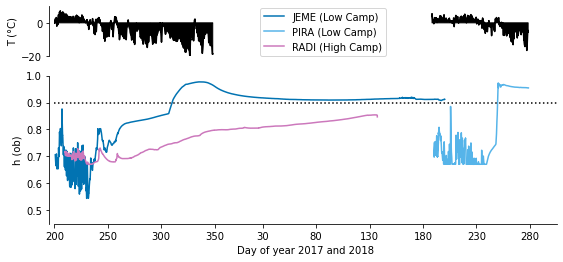

In [4]:
fig, ax = plt.subplots(2,figsize=(9,4), gridspec_kw={'height_ratios':[1,3]})

xlim = 200,670


ax[0].plot(weather_LC.DOY,weather_LC.Temp, color='black')
ax[0].fill_between(weather_LC.DOY.to_numpy(),0,weather_LC.Temp.to_numpy(),color='black')
#ax[0].plot(weather_HC.DOY,weather_HC.Temp, color='black')
#ax[0].fill_between(weather_HC.DOY.to_numpy(),0,weather_HC.Temp.to_numpy(),color='lightgrey')
ax[0].set_ylabel('T (°C)')
ax[0].set_ylim(-20,10)
ax[0].set_xlim(xlim)
#ax[0].set_yticks([0,4,8])
ax[0].spines['left'].set_bounds([-20,10])

ax[1].plot(jeme.doy,jeme.ob, label='JEME (Low Camp)', color=darkblue)
ax[1].plot(pira.doy+365,pira.ob, label='PIRA (Low Camp)', color=purple)
ax[1].plot(radi.doy,radi.ob, label='RADI (High Camp)', color=lightblue)

ax[1].set_xlim(xlim)
ax[1].set_ylim(0.45,1)
ax[1].axhline(y=0.9,color='black', linestyle=':')
ax[1].set_ylabel('h (ob)')

ax[1].set_xticks([200,250,300,350,400-5,450-5,500-5,550-5,600-5, 650-5])
ax[1].set_xticklabels([200,250,300,350,400-370,450-370,500-370,550-370,600-370, 650-370])

ax[1].set_xlabel('Day of year 2017 and 2018')
ax[1].set_ylabel('h (ob)')
ax[1].legend(bbox_to_anchor=(0.4,1.1))

sns.despine(ax=ax[0], bottom=True, offset=(5,0))
sns.despine(ax=ax[1], bottom=False, offset=(5,0))
ax[0].tick_params(bottom=False, labelbottom=False)

plt.savefig('moulin_closure.pdf')

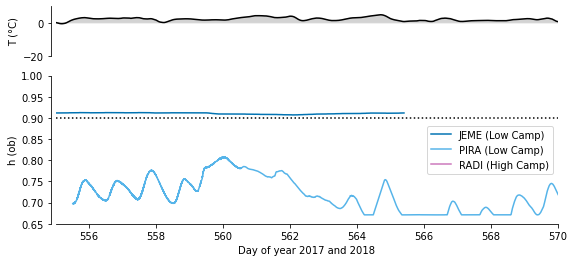

In [115]:
fig, ax = plt.subplots(2,figsize=(9,4), gridspec_kw={'height_ratios':[1,3]})

xlim = 555,570


ax[0].plot(weather_LC.DOY,weather_LC.Temp, color='black')
ax[0].fill_between(weather_LC.DOY.to_numpy(),0,weather_LC.Temp.to_numpy(),color='lightgrey')
#ax[0].plot(weather_HC.DOY,weather_HC.Temp, color='black')
#ax[0].fill_between(weather_HC.DOY.to_numpy(),0,weather_HC.Temp.to_numpy(),color='lightgrey')
ax[0].set_ylabel('T (°C)')
ax[0].set_ylim(-20,10)
ax[0].set_xlim(xlim)
#ax[0].set_yticks([0,4,8])
ax[0].spines['left'].set_bounds([-20,10])

ax[1].plot(jeme.doy,jeme.ob, label='JEME (Low Camp)', color=darkblue)
ax[1].plot(pira.doy+365,pira.ob, label='PIRA (Low Camp)', color=purple)
ax[1].plot(radi.doy,radi.ob, label='RADI (High Camp)', color=lightblue)

ax[1].set_xlim(xlim)
ax[1].set_ylim(0.65,1)
ax[1].axhline(y=0.9,color='black', linestyle=':')
ax[1].set_ylabel('h (ob)')

#ax[1].set_xticks([550-5,600-5])
#ax[1].set_xticklabels([550-370,600-370])

ax[1].set_xlabel('Day of year 2017 and 2018')
ax[1].set_ylabel('h (ob)')
ax[1].legend()

sns.despine(ax=ax[0], bottom=True, offset=(5,0))
sns.despine(ax=ax[1], bottom=False, offset=(5,0))
ax[0].tick_params(bottom=False, labelbottom=False)

plt.savefig('moulin_closure.pdf')